# Bank Loan Acceptance Prediction

In [7]:
import numpy as np
import pandas as pd

In [2]:
# reading the dataset
data=pd.read_excel('/content/Bank_loan_data (2).xlsx')

In [4]:
#getting top 5 values
data.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


In [6]:
# getting the shape of the given dataset--->(rows,columns)
data.shape

(5000, 16)

# Getting some information of the dataset

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              3404 non-null   object 
 3   Experience          5000 non-null   int64  
 4   Income              4933 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      3811 non-null   object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              4960 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

In [9]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,4933.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4960.000000,5000.000000
mean,2500.500000,46.008200,20.104600,72.758159,93152.503000,2.396400,1.937913,1.880600,56.498800,0.104400,0.06040,0.596976,0.294000
std,1443.520003,25.444898,11.467954,45.425519,2121.852197,1.147663,1.747666,0.839812,101.713802,0.305809,0.23825,0.490555,0.455637
min,1.000000,0.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,63.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,978.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
data.corr()

<ipython-input-10-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.022173,-0.008326,-0.022748,0.013432,-0.016797,-0.024672,0.022141,-0.013920,-0.016972,-0.006909,-0.003776,0.017028
Age,-0.022173,1.000000,0.439132,0.026946,-0.022257,-0.017867,0.011769,0.024320,0.021672,-0.008234,0.022654,0.005506,-0.000087
Experience,-0.008326,0.439132,1.000000,-0.049319,-0.028626,-0.052563,-0.050089,0.014071,-0.010582,-0.001232,0.010353,0.013981,0.008967
Income,-0.022748,0.026946,-0.049319,1.000000,-0.018415,-0.167167,0.643791,-0.204080,0.201489,-0.004553,0.150053,0.011320,-0.008559
ZIP Code,0.013432,-0.022257,-0.028626,-0.018415,1.000000,0.011778,-0.004068,-0.017598,0.007383,0.004704,0.019972,0.017773,0.007691
Family,-0.016797,-0.017867,-0.052563,-0.167167,0.011778,1.000000,-0.109285,0.065098,-0.020445,0.019994,0.014110,0.010994,0.011588
CCAvg,-0.024672,0.011769,-0.050089,0.643791,-0.004068,-0.109285,1.000000,-0.136096,0.109909,0.015087,0.136537,-0.002092,-0.006686
Education,0.022141,0.024320,0.014071,-0.204080,-0.017598,0.065098,-0.136096,1.000000,-0.033482,-0.010650,0.014056,-0.014687,-0.010707
Mortgage,-0.013920,0.021672,-0.010582,0.201489,0.007383,-0.020445,0.109909,-0.033482,1.000000,-0.005411,0.089311,-0.005379,-0.007231
Securities Account,-0.016972,-0.008234,-0.001232,-0.004553,0.004704,0.019994,0.015087,-0.010650,-0.005411,1.000000,0.317034,0.011502,-0.015028


In [11]:
# checking the null values in the given dataset
data.isnull().sum()

ID                       0
Age                      0
Gender                1596
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

## Handling the missing values

In [12]:
data['Gender'].value_counts()

M    1677
F    1607
O      96
-      21
#       3
Name: Gender, dtype: int64

In [13]:
# since there is available of unnecessary values like '-' and '#'. So handling
data['Gender'].replace(['#', '-'], np.nan, inplace=True)
data.dropna(subset=['Gender'], inplace=True)

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data['Gender'] = imputer.fit_transform(data[['Gender']])

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [16]:
print(data['Gender'].value_counts())


1    1677
0    1607
2      96
Name: Gender, dtype: int64


In [17]:
# replacing the missing values of income and Online with their mean
mean_income = data['Income'].mean()
mean_Online=data['Online'].mean()

In [18]:
data['Income'].fillna(mean_income,inplace=True)
data['Online'].fillna(mean_Online,inplace=True)

In [19]:
# Impute missing values in 'Home Ownership' with the mode
mode_home_ownership = data['Home Ownership'].mode()[0]
data['Home Ownership'].fillna(mode_home_ownership, inplace=True)

In [20]:
data.isnull().sum()

ID                    0
Age                   0
Gender                0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Home Ownership        0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [21]:
# The task of handling the missing values of the columns is successfully completed . Now heading towards further steps

In [22]:
# Droping the unnecessary columns
data.drop(columns=['ID','ZIP Code'],inplace=True)

In [23]:
data.head()

,Age,Gender,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,1,49.0,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,45,1,19,34.0,3,1.5,1,0,Rent,0,1,0,0.0,0
2,39,1,15,11.0,1,1.0,1,0,Rent,0,0,0,0.0,0
3,35,1,9,100.0,1,2.7,2,0,Rent,0,0,0,0.0,0
4,35,1,8,45.0,4,1.0,2,0,Rent,0,0,0,0.0,1


## Performing some EDA

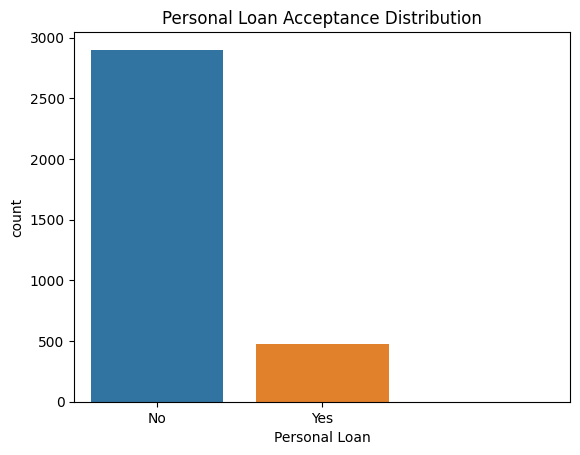

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore target variable distribution
sns.countplot(x='Personal Loan', data=data)
plt.title('Personal Loan Acceptance Distribution')
plt.xticks([0,1],['No','Yes'])
plt.show()

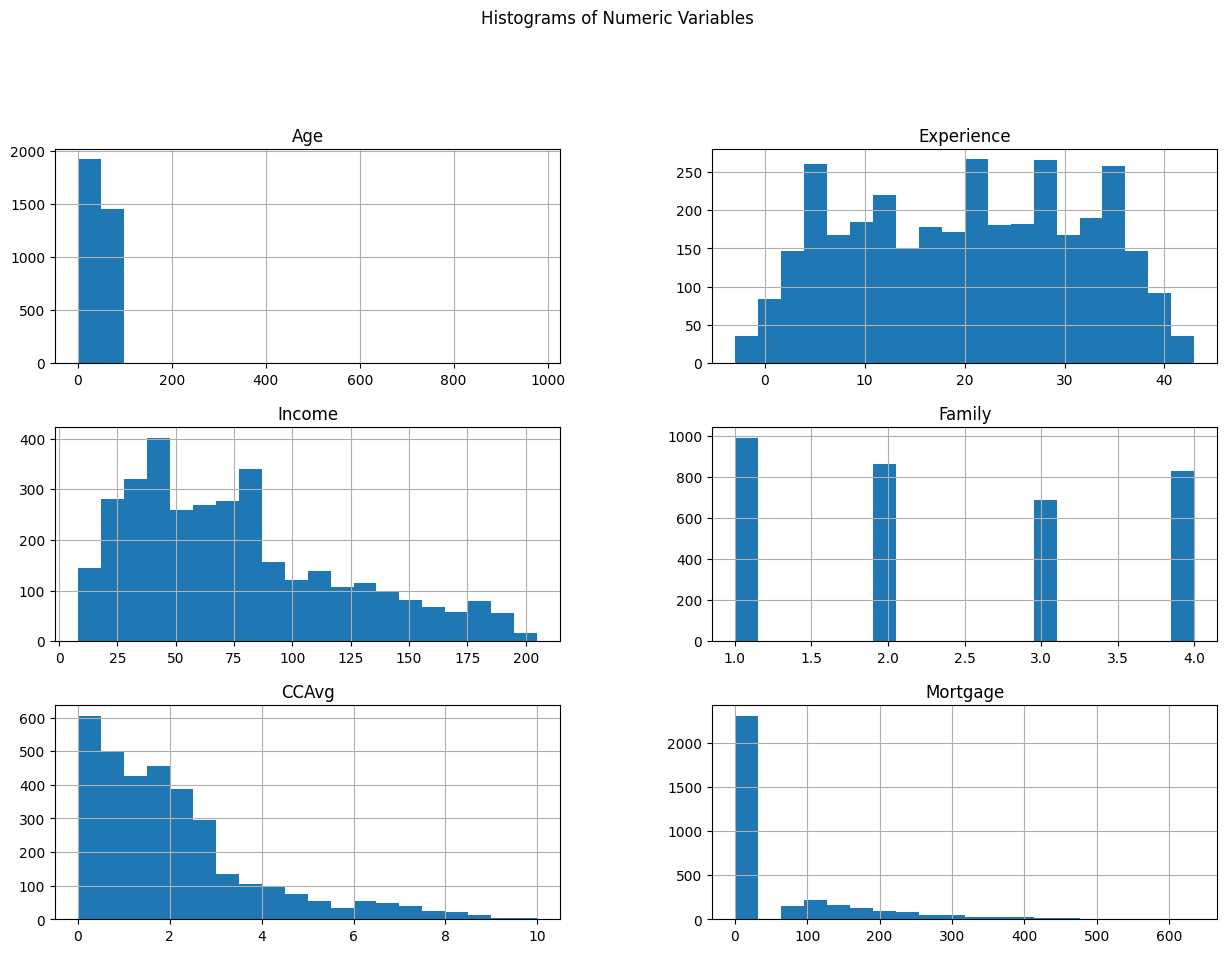

In [25]:
# Histograms for numeric variables
numeric_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
data[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Variables', y=1.02)
plt.show()

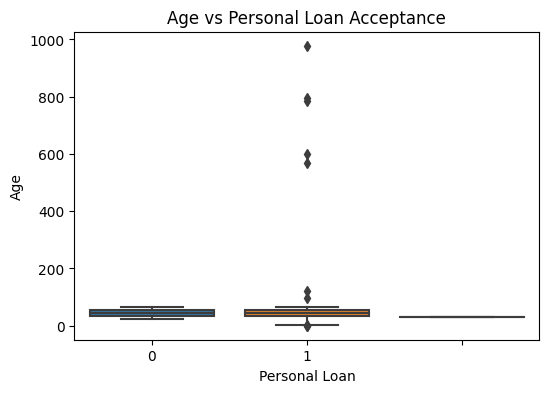

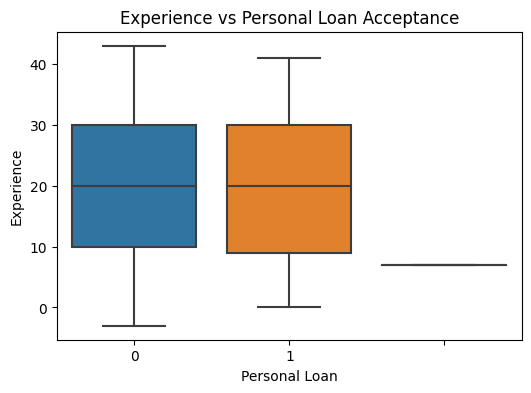

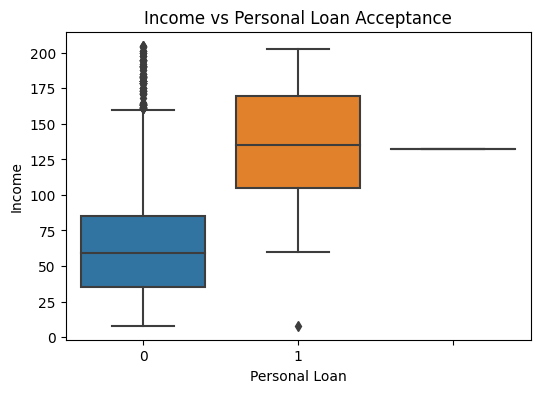

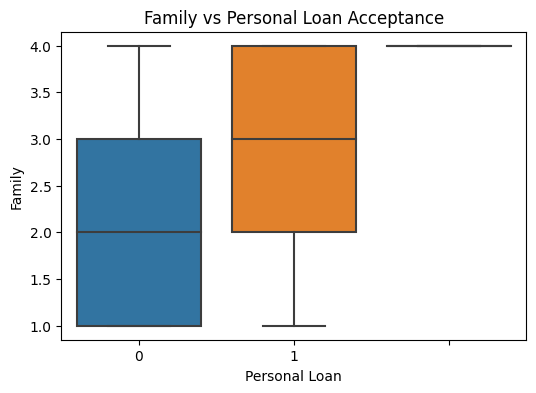

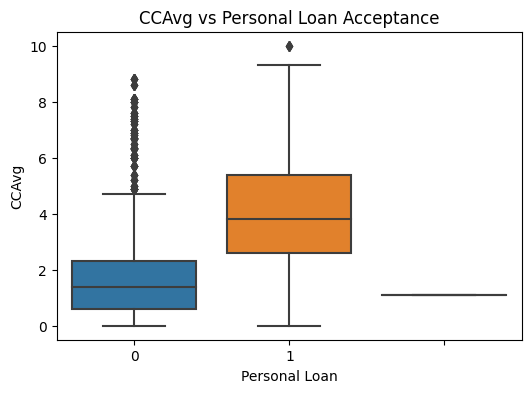

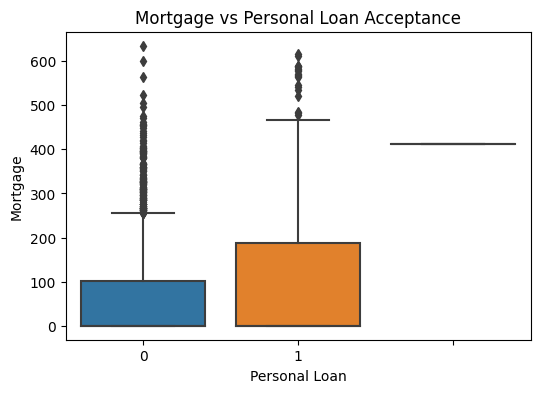

In [26]:
# Box plots for numeric variables vs. 'Personal Loan'
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Personal Loan', y=col, data=data)
    plt.title(f'{col} vs Personal Loan Acceptance')
    plt.show()

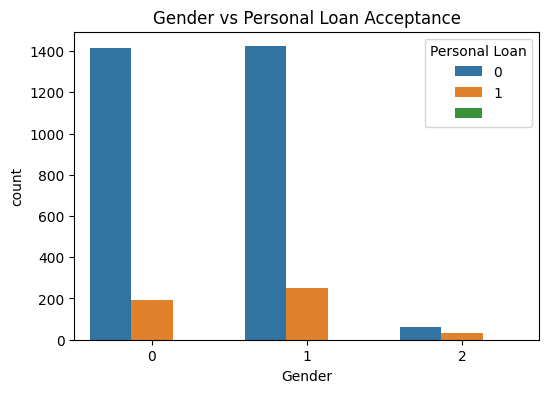

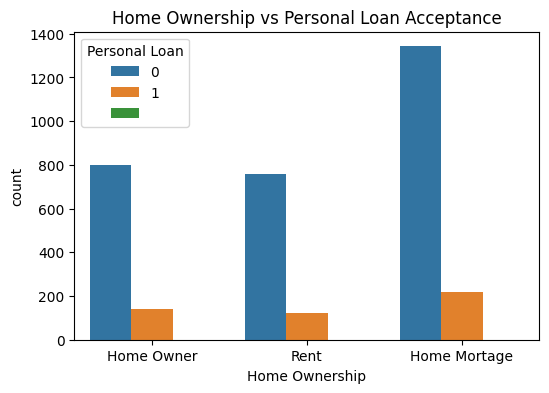

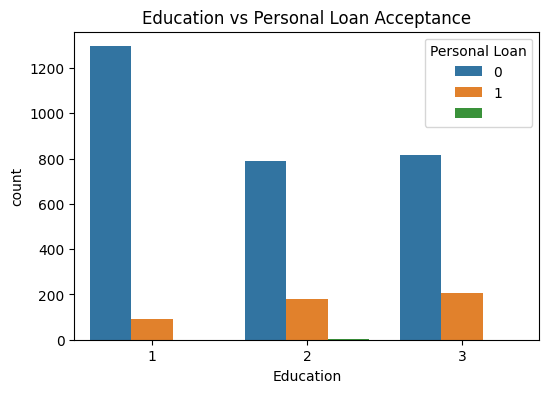

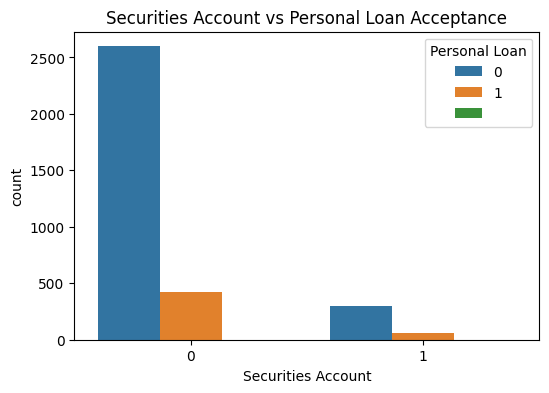

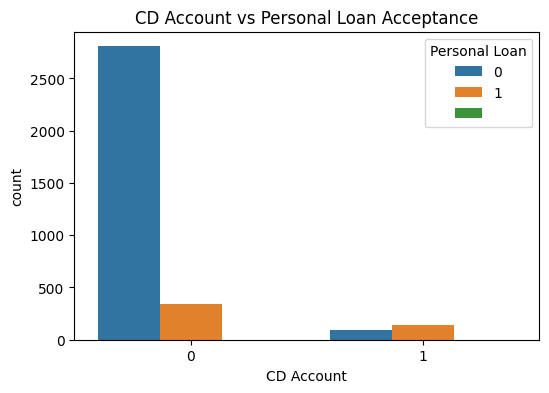

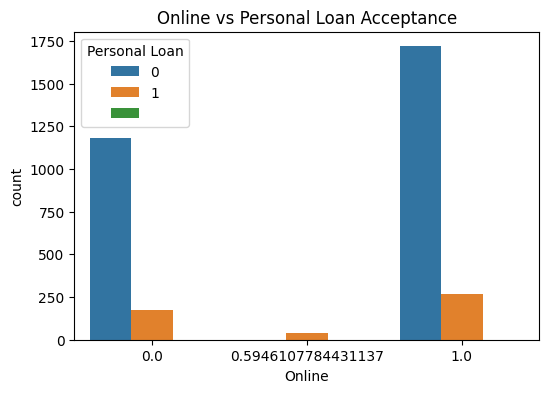

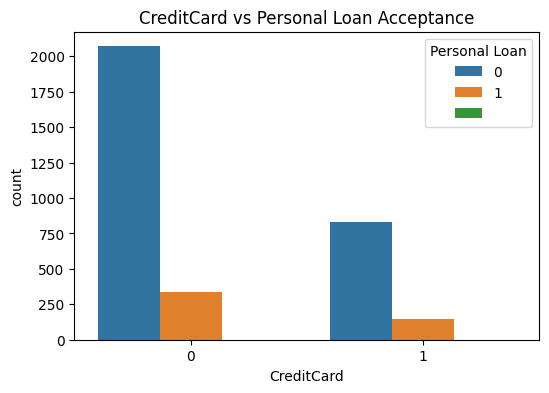

In [27]:
# Count plots for categorical variables
categorical_cols = ['Gender', 'Home Ownership', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Personal Loan', data=data)
    plt.title(f'{col} vs Personal Loan Acceptance')
    plt.show()

In [28]:
data['Online'].value_counts()

1.000000    1986
0.000000    1354
0.594611      40
Name: Online, dtype: int64

<ipython-input-31-15336ea566b7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),fmt=".2f",annot=True)


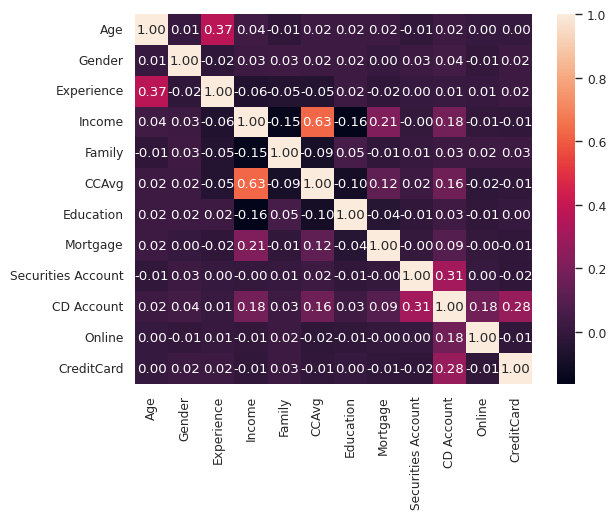

<Figure size 3200x2300 with 0 Axes>

In [31]:
import seaborn as sns
sns.set(context='paper', style='whitegrid', font_scale=1)
sns.heatmap(data.corr(),fmt=".2f",annot=True)
plt.figure(figsize=(32,23))
plt.show()

In [32]:
data.head(2)

,Age,Gender,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,1,49.0,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,45,1,19,34.0,3,1.5,1,0,Rent,0,1,0,0.0,0


In [33]:
# Converting the string values into integer value from the particular columns

In [34]:

data['Home Ownership'].value_counts()

Home Mortage    1561
Home Owner       937
Rent             882
Name: Home Ownership, dtype: int64

In [35]:
home_ownership_mapping={'Home Mortage':0,'Home Owner':1,'Rent':2}
data['Home Ownership']=data['Home Ownership'].map(home_ownership_mapping)

In [39]:
data.head(2)

,Age,Gender,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,1,49.0,4,1.6,1,0,1,0,1,0,0.0,0
1,45,1,19,34.0,3,1.5,1,0,2,0,1,0,0.0,0


In [41]:
# there is unwanted value i.e blank values in the column "Personal Loan" so removing it from the columns
data = data[data['Personal Loan'] !=' ']

In [42]:
data['Personal Loan'].value_counts()


0    2900
1     479
Name: Personal Loan, dtype: int64

In [44]:
# Separating the dataset into X(features) and y(target) variable
X=data.drop('Personal Loan',axis=1)
y=data['Personal Loan'].astype('int')


In [45]:
X.head()

,Age,Gender,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Securities Account,CD Account,Online,CreditCard
0,25,1,1,49.0,4,1.6,1,0,1,1,0,0.0,0
1,45,1,19,34.0,3,1.5,1,0,2,1,0,0.0,0
2,39,1,15,11.0,1,1.0,1,0,2,0,0,0.0,0
3,35,1,9,100.0,1,2.7,2,0,2,0,0,0.0,0
4,35,1,8,45.0,4,1.0,2,0,2,0,0,0.0,1


In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [47]:
# splitting the dataset using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# normalizing the splitted dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [49]:
# building a model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [51]:
# fit the model
model.fit(X_train,y_train)


LogisticRegression()

In [52]:
# Make predictions
y_pred = model.predict(X_test)

In [54]:
# importing for checking accuracy of the model

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
classification_report=classification_report(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)

In [56]:
print(f'The accuracy of the model is {accuracy*100}%')

The accuracy of the model is 93.34319526627219%


In [58]:
# getting the confusion matrix
cm


array([[565,  13],
       [ 32,  66]])

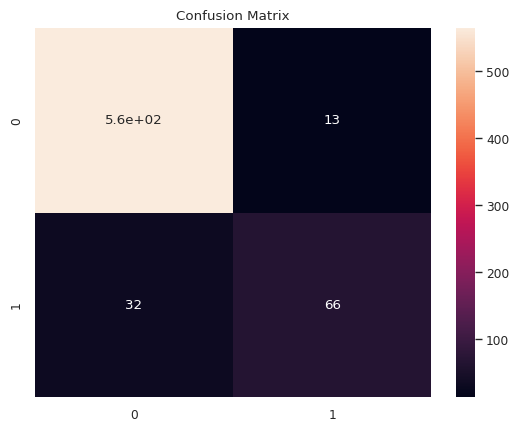

In [59]:
# heatmap for confusion matrix
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix")
plt.show()

In [60]:
# getting the accuracy,f1-score of the model
print(classification_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       578
           1       0.84      0.67      0.75        98

    accuracy                           0.93       676
   macro avg       0.89      0.83      0.85       676
weighted avg       0.93      0.93      0.93       676



In [61]:
# Saving the model
import pickle
pickle.dump(model,open('model.pkl','wb'))